In [195]:
#Modules necesary for the following section
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image
from scipy.spatial import distance

%matplotlib inline
import matplotlib
import numpy as np

import skimage 
from skimage import io, filters

import glob
import os

In [196]:
# Obtain and print the path to the images. Print the number of images in total.
path = str(os.getcwd())
path = path + "/Images/All/*.png"
print(path)

archivos = glob.glob(path)
arch = len(archivos)
print("Files:", arch)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/*.png
Files: 2


In [197]:
# Filename: the path to a specified image which is going to be analyzed. 
# Arname: the name of the image to be analyzed
#for i in archivos:
#    print(i)

filename = archivos[0] #The 44 value can change to select other pictures. To use all see bottom of the code
arname = filename[177:] #Mod this to have cut to the name of the file only

print(filename)
print(arname)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/dla_3200_200x200.png
dla_3200_200x200.png


In [198]:
# (1) Import the file to be analyzed!
img_file = Image.open(filename)
img = img_file.load()

# (2) Get image width & height in pixels
[xs, ys] = img_file.size
print("Total image size: ", xs*ys)

pixels = [] #Array positions [x,y] for each pixel
all_pixels = [] #Same with [x, y, n], which n = 1 for a lighted pixel and n = 0 for a dark one.
array_img = [] #Array with 1 or 0 which resembles the image taken

# (3) Examine each pixel in the image file
for x in range(0, xs):
    line = []
    for y in range(0, ys):
        # (4)  Get the RGB color of the pixel
        [r, g, b, k] = img[x, y]

        # (5)  Normalize pixel color values
        r /= 255.0
        g /= 255.0
        b /= 255.0
    
        if r != 0 or g != 0 or b !=0:
            pixels.append([x,y])
            all_pixels.append([x,y, 1])
            line.append(1)
        
        if r == 0 and g == 0 and b == 0:
            all_pixels.append([x,y, 0])
            line.append(0)
    
    array_img.append(line)
        
nP = len(pixels)
print("Number of lighted pixels:",nP, " Percentage:", 5747/400, "%")

Total image size:  40000
Number of lighted pixels: 5747  Percentage: 14.3675 %


In [199]:
# Obtain the number of pixels in a certain distance
interval = 2
R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval)
nR = len(R)
print("Radius:", nR, " Interval:", interval)
dR = 0
count = np.zeros((nP, nR))

corr = np.zeros((nR, 1))

narray_img = np.array(array_img)
indx = np.where(narray_img > 0) #indx is 2 arrays with x and y points where the condition is met
nx = len(indx[0]) #nx == ny

y, x = np.meshgrid(np.arange(xs), np.arange(ys))
cx, cy = indx

for c in range(0, nx):
    x0 = cx[c]
    y0 = cy[c]
    
    r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    if c%int(nx/100) == 0:
        print(c, c/nx*100, "%")
    
    if c == nx - 1:
        print("100 %")
    
    for nr in range(nR):
        rad = R[nr]
        ridx = np.where((r >= rad)*(r < rad+interval))
        CR = np.mean(narray_img[ridx])
        corr[nr] += CR

Radius: 142  Interval: 2
0 0.0 %


/Users/jorgeriverosvergara/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jorgeriverosvergara/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


57 0.9918218200800417 %
114 1.9836436401600834 %
171 2.9754654602401254 %
228 3.967287280320167 %
285 4.959109100400209 %
342 5.950930920480251 %
399 6.942752740560293 %
456 7.934574560640334 %
513 8.926396380720377 %
570 9.918218200800418 %
627 10.91004002088046 %
684 11.901861840960501 %
741 12.893683661040543 %
798 13.885505481120585 %
855 14.877327301200626 %
912 15.869149121280667 %
969 16.86097094136071 %
1026 17.852792761440753 %
1083 18.844614581520794 %
1140 19.836436401600835 %
1197 20.828258221680876 %
1254 21.82008004176092 %
1311 22.811901861840962 %
1368 23.803723681921003 %
1425 24.795545502001044 %
1482 25.787367322081085 %
1539 26.779189142161126 %
1596 27.77101096224117 %
1653 28.76283278232121 %
1710 29.754654602401253 %
1767 30.746476422481294 %
1824 31.738298242561335 %
1881 32.730120062641376 %
1938 33.72194188272142 %
1995 34.71376370280146 %
2052 35.705585522881506 %
2109 36.69740734296155 %
2166 37.68922916304159 %
2223 38.68105098312163 %
2280 39.6728728032016

In [200]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0.26
A = 2000

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

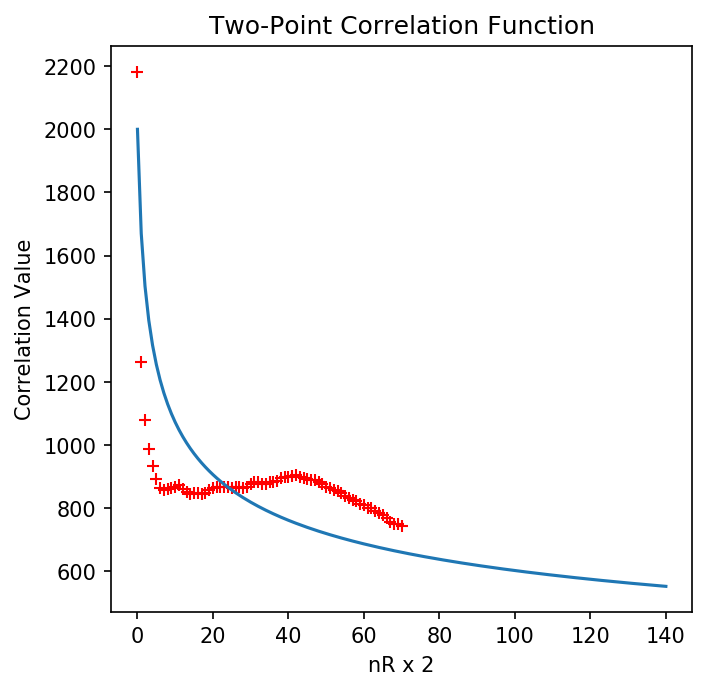

In [201]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

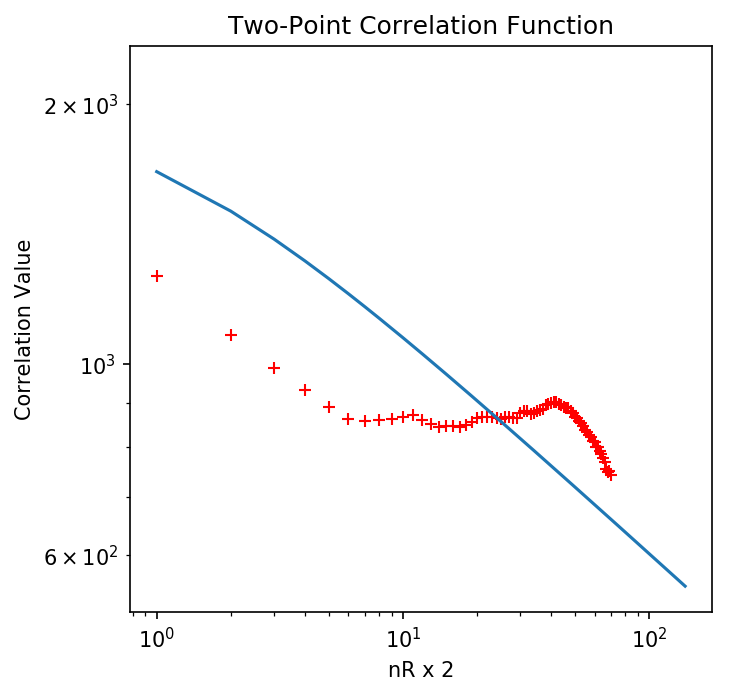

In [202]:
# Plot the same lists in logaritmic scale
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
plt.plot(fitt)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_loglog_%s.png' %arname)
plt.show()

In [181]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)

The fractal dimension is: 1.74


Use this portion of the code to analyze all of the images in the provided path.

It may take a long time to finish.

In [ ]:
lcorr = []

for nimage in range(0, len(archivos)):
    filename = archivos[nimage] #The 44 value can change to select other pictures. To use all see bottom of the code
    arname = filename[177:] #Mod this to have cut to the name of the file only

    print(arname)
    
    # (1) Import the file to be analyzed!
    img_file = Image.open(filename)
    img = img_file.load()

    # (2) Get image width & height in pixels
    [xs, ys] = img_file.size
    print("Total image size: ", xs*ys)
    
    pixels = [] #Array positions [x,y] for each pixel
    all_pixels = [] #Same with [x, y, n], which n = 1 for a lighted pixel and n = 0 for a dark one.
    array_img = [] #Array with 1 or 0 which resembles the image taken

    # (3) Examine each pixel in the image file
    for x in range(0, xs):
        line = []
        for y in range(0, ys):
            # (4)  Get the RGB color of the pixel
            [r, g, b, k] = img[x, y]

            # (5)  Normalize pixel color values
            r /= 255.0
            g /= 255.0
            b /= 255.0
    
            if r != 0 or g != 0 or b !=0:
                pixels.append([x,y])
                all_pixels.append([x,y, 1])
                line.append(1)
        
            if r == 0 and g == 0 and b == 0:
                all_pixels.append([x,y, 0])
                line.append(0)
    
        array_img.append(line)
        
    nP = len(pixels)
    print("Number of lighted pixels:",nP, " Percentage:", 5747/400, "%")
    
    
    # Obtain the number of pixels in a certain distance
    interval = 2
    R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval)
    nR = len(R)
    print("Radius:", nR, " Interval:", interval)
    dR = 0
    count = np.zeros((nP, nR))

    corr = np.zeros((nR, 1))

    narray_img = np.array(array_img)
    indx = np.where(narray_img > 0) #indx is 2 arrays with x and y points where the condition is met
    nx = len(indx[0]) #nx == ny
    y, x = np.meshgrid(np.arange(xs), np.arange(ys))
    cx, cy = indx

    for c in range(0, nx):
        x0 = cx[c]
        y0 = cy[c]
    
        r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
        if c%int(nx/100) == 0:
            print(c, c/nx*100, "%")
    
        if c == nx - 1:
            print("100 %\n\n")
    
        for nr in range(nR):
            rad = R[nr]
            ridx = np.where((r >= rad)*(r < rad+interval))
            CR = np.mean(narray_img[ridx])
            corr[nr] += CR
        
    lcorr.append(corr)

In [182]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0.26
A = 2000

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

In [ ]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(lcorr, "r+")
plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

In [ ]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)